<a href="https://colab.research.google.com/github/Aathavan-19/ML-Project/blob/main/housePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plot
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


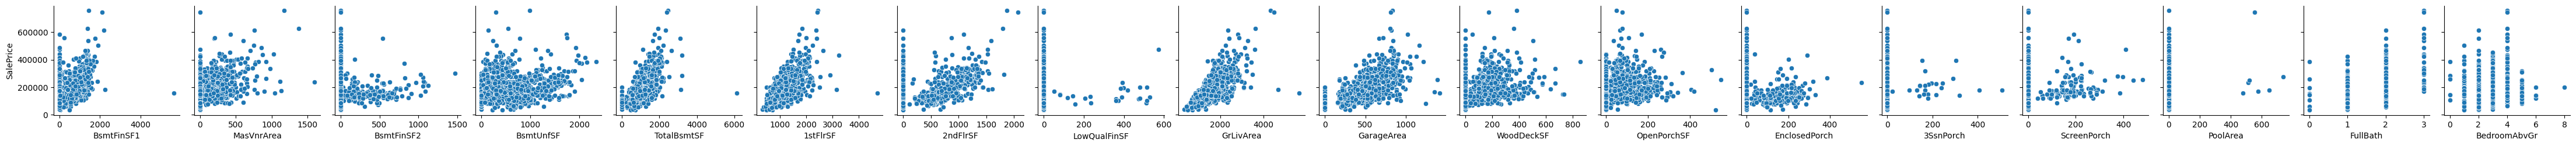

In [ ]:
pp = sns.pairplot(data=train,
                  x_vars=['BsmtFinSF1','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','FullBath','BedroomAbvGr'],
                  y_vars=['SalePrice'])

In [ ]:
features = ['BsmtFinSF1','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','FullBath','BedroomAbvGr']
target = 'SalePrice'

In [ ]:
x_train = train[features]
y_train = train[target]

In [ ]:
x_train.fillna(x_train.median(),inplace=True)

<ipython-input-8-40cba97f8942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.fillna(x_train.median(),inplace=True)


In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x_train,y_train,test_size=0.1, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([125903.07128203, 311493.47155148, 118875.54016523, 182991.22730553,
       269215.50617192,  79707.48007135, 178474.07910496, 167952.78174482,
        73893.05767393, 150823.63948394, 149321.14717669,  99149.97483661,
       178824.78937264, 199838.46518194, 188672.85214311, 122143.24741055,
       186839.71256291, 131153.93937899, 115629.73349888, 214648.63751166,
       191458.30029482, 187620.12603221, 176677.59447088, 122234.00648309,
       201394.13363112, 180404.05306276, 172440.4135346 , 114378.99258451,
       178262.13131501, 190896.36718676, 129027.94403514, 275266.69745082,
       265246.81777185, 115297.15955818, 237392.07205268, 156251.17313343,
       160651.58324687, 187201.86848327, 270394.5454143 ,  73832.67057843,
       117375.48193884, 218271.53691697, 102273.97699103, 318574.44000947,
       134774.97408802, 173377.72833533, 110186.31513212, 115383.39241335,
       327423.32751083, 148708.86550479, 104857.7563536 , 255438.25478368,
       111276.93262869, 2

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.789277276023379
Mean Squared Error: 1925297627.3639128
Mean Absolute Error: 26169.001781239607


In [ ]:
X_test = test[features]
X_test.fillna(X_test.median(),inplace=True)

<ipython-input-14-c0451fd6806c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(),inplace=True)


In [ ]:
test_pred = model.predict(X_test)

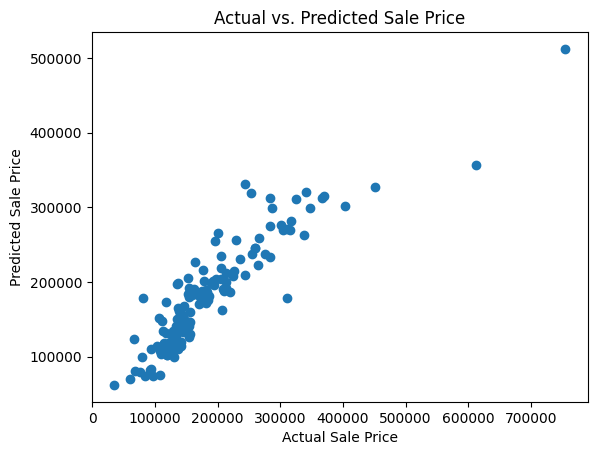

In [ ]:
plot.scatter(y_test, y_pred)
plot.xlabel('Actual Sale Price')
plot.ylabel('Predicted Sale Price')
plot.title('Actual vs. Predicted Sale Price')
plot.show()

In [ ]:
X_test = test[features]
X_test.fillna(X_test.median(),inplace=True)

<ipython-input-17-c0451fd6806c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(),inplace=True)


In [ ]:
test_pred = model.predict(X_test)

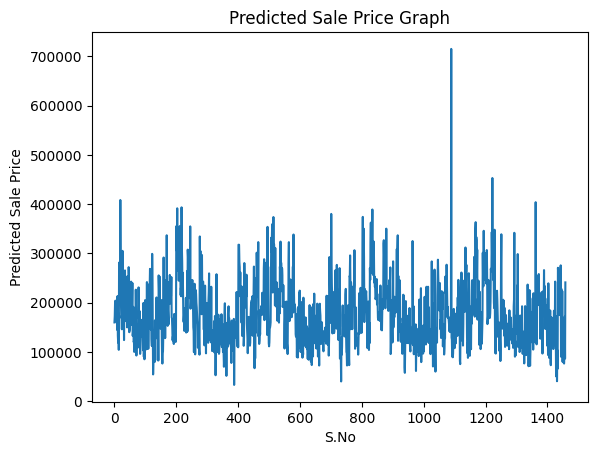

In [ ]:
plot.plot(test_pred)
plot.xlabel('S.No')
plot.ylabel('Predicted Sale Price')
plot.title('Predicted Sale Price Graph')
plot.show()